## Data Wrangling: Step 1. Gathering data:
- Original CSV file
- Image Predictions TSV file
- Additional Data gathered via Twitter API

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import requests
import json

### Uploading and reading the original file

In [3]:
df_upl = pd.read_csv('twitter-archive-enhanced.csv')
df_upl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [4]:
df = df_upl.copy()

In [5]:
#getting a list of tweet ids to use with API later down the line
tweet_ids = df.tweet_id.tolist()
tweet_ids [:5]

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256]

### Importing tweet image predictions _(a TSV file stored on Udacity servers)_

In [4]:
import tweepy
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv" 
req = requests.get(url)
url_content = req.content
tsv_file = open('image_predictions.tsv', 'wb')
tsv_file.write(url_content)
tsv_file.close()

In [6]:
tsv_upload = pd.read_csv('image_predictions.tsv', sep='\t')


In [8]:
tsv_upload.head()
tsv = tsv_upload.copy()
tsv.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Gathering additional data via Twitter API

In [5]:
### create an API object to gather Twitter data
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
token_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, token_secret)
api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(), wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [6]:
#testing credentials
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [11]:
index = 0
error_dict = {}
result=[]
import json

with open('tweet_json.txt', 'w') as f:
    for tw in tweet_ids:
        index +=1
        print(str(index) + ':' + str(tw))
        try:
            result = api.get_status(tw, tweet_mode = 'extended')
            print('Success')
            f.write(json.dumps(result) + '\n')
        except tweepy.TweepError as e:
            print('fail')
            error_dict[tw] = e
            pass
print(error_dict)

1:892420643555336193
Success
2:892177421306343426
Success
3:891815181378084864
Success
4:891689557279858688
Success
5:891327558926688256
Success
6:891087950875897856
Success
7:890971913173991426
Success
8:890729181411237888
Success
9:890609185150312448
Success
10:890240255349198849
Success
11:890006608113172480
Success
12:889880896479866881
Success
13:889665388333682689
Success
14:889638837579907072
Success
15:889531135344209921
Success
16:889278841981685760
Success
17:888917238123831296
Success
18:888804989199671297
Success
19:888554962724278272
Success
20:888202515573088257
fail
21:888078434458587136
Success
22:887705289381826560
Success
23:887517139158093824
Success
24:887473957103951883
Success
25:887343217045368832
Success
26:887101392804085760
Success
27:886983233522544640
Success
28:886736880519319552
Success
29:886680336477933568
Success
30:886366144734445568
Success
31:886267009285017600
Success
32:886258384151887873
Success
33:886054160059072513
Success
34:885984800019947520


## Data Wrangling: Step 2. Assessing data


In [9]:
with open('tweet_json.txt', 'rb') as file:
    data = file.readlines()

In [10]:
with open('tweet_json.txt', encoding="utf8") as f:
    data = f.readlines()
    data = [json.loads(line) for line in data] #convert string to dict format
dftw = pd.DataFrame(data) # Load into dataframe

In [11]:
dftw.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [17]:
#display all columns
from IPython.display import display

pd.options.display.max_columns = None
display(dftw)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",35460,False,This is Phineas. He's a mystical boy. Only eve...,None,892420643555336193,892420643555336193,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,NaN,7488,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",30695,False,This is Tilly. She's just checking pup on you....,None,892177421306343426,892177421306343426,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,NaN,5557,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",23089,False,This is Archie. He is a rare Norwegian Pouncin...,None,891815181378084864,891815181378084864,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,NaN,3680,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",38750,False,This is Darla. She commenced a snooze mid meal...,None,891689557279858688,891689557279858688,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,NaN,7665,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",37027,False,This is Franklin. He would like you to stop ca...,None,891327558926688256,891327558926688256,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,NaN,8267,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",18666,False,Here we have a majestic great white breaching ...,None,891087950875897856,891087950875897856,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,NaN,2767,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",10849,False,Meet Jax. He enjoys ice cream so much he gets ...,None,890971913173991426,890971913173991426,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,NaN,1797,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",59775,False,When you watch your owner call another dog a g...,None,890729181411237888,890729181411237888,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,NaN,16770,False,NaN,"<a href="

In [18]:
display(dftw.user[0])

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs®',
 'screen_name': 'dog_rates',
 'location': 'Adoptable Dogs ➡️',
 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀',
 'url': 'https://t.co/4W7xbIw5dg',
 'entities': {'url': {'urls': [{'url': 'https://t.co/4W7xbIw5dg',
     'expanded_url': 'https://campsite.bio/weratedogs',
     'display_url': 'campsite.bio/weratedogs',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 8877190,
 'friends_count': 19,
 'listed_count': 5983,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 145929,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 13020,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'htt

In [19]:
dftw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2331 non-null object
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null object
id                               2331 non-null int64
id_str                           2331 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

In [20]:
dftw.id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: id, dtype: int64

## Data Wrangling: Step 3. Cleaning data
Renaming columns
Dropping null
Merging datasets


In [13]:
df2=dftw.copy()

In [22]:
!pip install hashable_df
from hashable_df import hashable_df

In [23]:
hashable_df(df2).duplicated().sum()

0

In [14]:
df2.drop(['id_str',
'in_reply_to_status_id_str',
'in_reply_to_user_id_str',
'quoted_status_id_str','place'],axis=1,inplace=True)

In [25]:
df2.isnull().sum().sum()

23380

In [15]:
#show asample of NaN rows
df2.loc[df.isnull().any(axis=1)].head()

,created_at,id,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_user_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,35460,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,30695,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,23089,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,38750,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,37027,False,False,False,False,en,NaN,NaN,NaN,NaN


In [16]:
df2.rename(columns={'id':'tweet_id'},inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2331 non-null   object 
 1   tweet_id                       2331 non-null   int64  
 2   full_text                      2331 non-null   object 
 3   truncated                      2331 non-null   bool   
 4   display_text_range             2331 non-null   object 
 5   entities                       2331 non-null   object 
 6   extended_entities              2059 non-null   object 
 7   source                         2331 non-null   object 
 8   in_reply_to_status_id          77 non-null     float64
 9   in_reply_to_user_id            77 non-null     float64
 10  in_reply_to_screen_name        77 non-null     object 
 11  user                           2331 non-null   object 
 12  geo                            0 non-null      o

In [17]:
api_tweets = df2.tweet_id.tolist()

In [18]:
#check for matching tweets between the original 
matching_tweets = set(tweet_ids).intersection(api_tweets)
len(matching_tweets)

2331

In [19]:
df.tweet_id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: int64

In [20]:
df2.tweet_id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: int64

In [21]:
df.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_user_id','retweeted_status_id','retweeted_status_timestamp'],axis=1, inplace=True)

In [22]:
df2.drop(["contributors", "coordinates", "geo", "in_reply_to_screen_name","in_reply_to_status_id", "in_reply_to_user_id", "quoted_status","quoted_status_id","quoted_status_permalink"],axis=1,inplace=True)



In [23]:
set(df.columns).intersection(set(df2.columns))
#matching columns

{'source', 'tweet_id'}

In [35]:
#in both our original dataset and API pulled dataset:
#tweet_is is int64
#source is a string
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 18 columns):
created_at                       2331 non-null object
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
tweet_id                         2331 non-null int64
is_quote_status                  2331 non-null bool
lang                             2331 non-null object
possibly_sensitive               2197 non-null object
possibly_sensitive_appealable    2197 non-null object
retweet_count                    2331 non-null int64
retweeted                        2331 non-null bool
retweeted_status                 163 non-null object
source                           2331 non-null object
truncated                        2331 n

In [37]:
tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [38]:
predict_tweet = tsv.tweet_id.tolist()
matching_tweets2 = set(tweet_ids).intersection(predict_tweet)
len(matching_tweets2)

2075

##  3. Cleaning data

### Tidiness -- Define:

1. Dog rating variable is split in two columns: combine the two to make a unified column
2. Irrelevant data is obstructing the view: drop unneeded columns and rows
3. Relevant data is stored in separate tables: combine into one

    
### Quality -- Define:

- "Timestamp" column variables are stored as string and should be converted to date/time
- 'api_tweet_id' needs to be renamed as 'tweet_id'
- 'api_source' needs to be renamed as 'source'
- "API_Entitiies" columns contains a series of dictionatiries (variables) that need to be split into separate columns
- Dog ratings are stored as string and need to be converted to float, so we can query them later
- Erroneous data need to be fixed, e.g. dog ratings should be over 1 (12/10, 11/10), those that are less than 1 (9/10, 8/10) are incorrect as they do not meet the standard of WeRateDogs
- "api_retweet_count" and "api_favorite_count" column variables are stored as floats and need to be converted to integers for future visualization
- "api_user" has multiple variables stored in one column: split into multiple those that are needed and drop the rest


In [39]:
df.query('tweet_id == 891815181378084864')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [40]:
df2.query('tweet_id == 891815181378084864')

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,tweet_id,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,retweeted_status,source,truncated,user
2,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",23089,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,False,en,False,False,3680,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [24]:
df2 = df2.add_prefix('api_')
tsv = tsv.add_prefix('img_')
tsv.head()

,img_tweet_id,img_jpg_url,img_img_num,img_p1,img_p1_conf,img_p1_dog,img_p2,img_p2_conf,img_p2_dog,img_p3,img_p3_conf,img_p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
df2.rename(columns={'api_tweet_id':'tweet_id'},inplace=True)
a
tsv.rename(columns={'img_tweet_id':'tweet_id'},inplace=True)
tsv.head()

,tweet_id,img_jpg_url,img_img_num,img_p1,img_p1_conf,img_p1_dog,img_p2,img_p2_conf,img_p2_dog,img_p3,img_p3_conf,img_p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
df_new = df.merge(df2,on=['tweet_id','source'], how='left')
#df_new = pd.concat([df,df2],verify_integrity=True,ignore_index=True,sort=False)

In [27]:
df_new.query('tweet_id == 891815181378084864')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,api_user,api_is_quote_status,api_retweet_count,api_favorite_count,api_favorited,api_retweeted,api_possibly_sensitive,api_possibly_sensitive_appealable,api_lang,api_retweeted_status
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,3680.0,23089.0,False,False,False,False,en,NaN


In [28]:
set(df_new.columns).intersection(set(tsv.columns))


{'tweet_id'}

In [46]:
tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id       2075 non-null int64
img_jpg_url    2075 non-null object
img_img_num    2075 non-null int64
img_p1         2075 non-null object
img_p1_conf    2075 non-null float64
img_p1_dog     2075 non-null bool
img_p2         2075 non-null object
img_p2_conf    2075 non-null float64
img_p2_dog     2075 non-null bool
img_p3         2075 non-null object
img_p3_conf    2075 non-null float64
img_p3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [47]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                             2356 non-null int64
timestamp                            2356 non-null object
source                               2356 non-null object
text                                 2356 non-null object
expanded_urls                        2297 non-null object
rating_numerator                     2356 non-null int64
rating_denominator                   2356 non-null int64
name                                 2356 non-null object
doggo                                2356 non-null object
floofer                              2356 non-null object
pupper                               2356 non-null object
puppo                                2356 non-null object
api_created_at                       2331 non-null object
api_display_text_range               2331 non-null object
api_entities                         2331 non-null object
api_extended_entities     

In [29]:
whole = df_new.merge(tsv,on=['tweet_id'], how='left')

In [30]:
whole.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_img_num,img_p1,img_p1_conf,img_p1_dog,img_p2,img_p2_conf,img_p2_dog,img_p3,img_p3_conf,img_p3_dog
827,769212283578875904,2016-08-26 16:37:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is DonDon. He's way up but doesn't feel b...,https://twitter.com/dog_rates/status/769212283...,12,10,DonDon,None,None,...,1.0,golden_retriever,0.166538,True,Pekinese,0.148215,True,cocker_spaniel,0.082735,True


In [50]:
whole.columns.sort_values()

Index(['api_created_at', 'api_display_text_range', 'api_entities',
       'api_extended_entities', 'api_favorite_count', 'api_favorited',
       'api_full_text', 'api_is_quote_status', 'api_lang',
       'api_possibly_sensitive', 'api_possibly_sensitive_appealable',
       'api_retweet_count', 'api_retweeted', 'api_retweeted_status',
       'api_truncated', 'api_user', 'doggo', 'expanded_urls', 'floofer',
       'img_img_num', 'img_jpg_url', 'img_p1', 'img_p1_conf', 'img_p1_dog',
       'img_p2', 'img_p2_conf', 'img_p2_dog', 'img_p3', 'img_p3_conf',
       'img_p3_dog', 'name', 'pupper', 'puppo', 'rating_denominator',
       'rating_numerator', 'source', 'text', 'timestamp', 'tweet_id'],
      dtype='object')

In [51]:
whole.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 39 columns):
tweet_id                             2356 non-null int64
timestamp                            2356 non-null object
source                               2356 non-null object
text                                 2356 non-null object
expanded_urls                        2297 non-null object
rating_numerator                     2356 non-null int64
rating_denominator                   2356 non-null int64
name                                 2356 non-null object
doggo                                2356 non-null object
floofer                              2356 non-null object
pupper                               2356 non-null object
puppo                                2356 non-null object
api_created_at                       2331 non-null object
api_display_text_range               2331 non-null object
api_entities                         2331 non-null object
api_extended_entities     

In [31]:
whole=whole.query("img_jpg_url == img_jpg_url")
#returning only rows containing images
whole.info()
#reducing to those that have their API additional info
whole=whole.query("api_favorited==api_favorited")
whole.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   tweet_id                           2075 non-null   int64  
 1   timestamp                          2075 non-null   object 
 2   source                             2075 non-null   object 
 3   text                               2075 non-null   object 
 4   expanded_urls                      2075 non-null   object 
 5   rating_numerator                   2075 non-null   int64  
 6   rating_denominator                 2075 non-null   int64  
 7   name                               2075 non-null   object 
 8   doggo                              2075 non-null   object 
 9   floofer                            2075 non-null   object 
 10  pupper                             2075 non-null   object 
 11  puppo                              2075 non-null   objec

In [53]:
whole.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,api_created_at,api_display_text_range,api_entities,api_extended_entities,api_favorite_count,api_favorited,api_full_text,api_is_quote_status,api_lang,api_possibly_sensitive,api_possibly_sensitive_appealable,api_retweet_count,api_retweeted,api_retweeted_status,api_truncated,api_user,img_jpg_url,img_img_num,img_p1,img_p1_conf,img_p1_dog,img_p2,img_p2_conf,img_p2_dog,img_p3,img_p3_conf,img_p3_dog
1259,710272297844797440,2016-03-17 01:11:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending i...,https://twitter.com/dog_rates/status/710272297...,11,10,infuriating,None,None,None,None,Thu Mar 17 01:11:26 +0000 2016,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 710272293939879938, 'id_str'...",4411.0,False,We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending i...,False,en,False,False,1211.0,False,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/Cdtk414WoAIUG0v.jpg,1.0,Old_English_sheepdog,0.586307,True,wire-haired_fox_terrier,0.118622,True,Lakeland_terrier,0.106806,True
2317,666644823164719104,2015-11-17 15:51:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He is a Botwanian Gouda. Can ...,https://twitter.com/dog_rates/status/666644823...,9,10,Jimothy,None,None,None,None,Tue Nov 17 15:51:26 +0000 2015,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666644794307837952, 'id_str'...",219.0,False,This is Jimothy. He is a Botwanian Gouda. Can ...,False,en,False,False,73.0,False,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg,1.0,Ibizan_hound,0.044333,True,Pembroke,0.043209,True,West_Highland_white_terrier,0.038906,True
805,772114945936949249,2016-09-03 16:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He's very nervous for the game. ...,https://twitter.com/dog_rates/status/772114945...,10,10,Finn,None,None,None,None,Sat Sep 03 16:52:02 +0000 2016,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 772114938034814977, 'id_str'...",2702.0,False,This is Finn. He's very nervous for the game. ...,False,en,False,False,464.0,False,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/Crcacf9WgAEcrMh.jpg,1.0,Chihuahua,0.803293,True,toy_terrier,0.052980,True,Italian_greyhound,0.037239,True
2050,671497587707535361,2015-12-01 01:14:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pip. He is a ship captain. Many years ...,https://twitter.com/dog_rates/status/671497587...,11,10,Pip,None,None,None,None,Tue Dec 01 01:14:35 +0000 2015,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 671497582414307329, 'id_str'...",868.0,False,This is Pip. He is a ship captain. Many years ...,False,en,False,False,419.0,False,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/CVGjflNWoAEwgrQ.jpg,1.0,swing,0.089165,False,paddle,0.080747,False,bathing_cap,0.065694,False
1236,712438159032893441,2016-03-23 00:37:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kane. He's a semi-submerged Haitian Hu...,https://twitter.com/dog_rates/status/712438159...,11,10,Kane,None,None,None,None,Wed Mar 23 00:37:48 +0000 2016,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 712438152884043776, 'id_str'...",5173.0,False,This is Kane. He's a semi-submerged Haitian Hu...,False,en,False,False,1515.0,False,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/CeMWubMWwAA6GwF.jpg,1.0,ice_bear,0.869477,False,Great_Pyrenees,0.069457,True,Labrador_retriever,0.024740,True


In [54]:
#You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
whole.query("api_retweeted == True").tweet_id.value_counts()

Series([], Name: tweet_id, dtype: int64)

In [49]:
whole['timestamp'] = pd.to_datetime(whole['timestamp'])

In [56]:
whole['rating_numerator'] = whole['rating_numerator'].astype(str)
whole['rating_denominator'] = whole['rating_denominator'].astype(str)
whole['rating'] = whole['rating_numerator'].str.cat(whole['rating_denominator'],sep="/")

In [57]:
whole.drop(['rating_denominator','rating_numerator'],axis=1,inplace=True)

In [58]:
whole = whole.reindex(columns = whole.columns)
whole.sample()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,api_created_at,api_display_text_range,api_entities,api_extended_entities,api_favorite_count,api_favorited,api_full_text,api_is_quote_status,api_lang,api_possibly_sensitive,api_possibly_sensitive_appealable,api_retweet_count,api_retweeted,api_retweeted_status,api_truncated,api_user,img_jpg_url,img_img_num,img_p1,img_p1_conf,img_p1_dog,img_p2,img_p2_conf,img_p2_dog,img_p3,img_p3_conf,img_p3_dog,rating
1638,684188786104872960,2016-01-05 01:44:52,"<a href=""http://twitter.com/download/iphone"" r...","""Yo Boomer I'm taking a selfie, grab your stic...",https://twitter.com/dog_rates/status/684188786...,None,None,None,None,None,Tue Jan 05 01:44:52 +0000 2016,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 684188780455170048, 'id_str'...",3412.0,False,"""Yo Boomer I'm taking a selfie, grab your stic...",False,en,False,False,1129.0,False,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/CX66EiJWkAAVjA-.jpg,1.0,kelpie,0.537782,True,American_Staffordshire_terrier,0.082953,True,Staffordshire_bullterrier,0.06976,True,10/10


In [59]:
whole.drop(["api_created_at", "api_display_text_range", "api_retweeted"],axis=1,inplace=True)

In [60]:
whole.drop(['api_full_text'],axis=1,inplace=True)

In [61]:
whole.sample()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,api_entities,api_extended_entities,api_favorite_count,api_favorited,api_is_quote_status,api_lang,api_possibly_sensitive,api_possibly_sensitive_appealable,api_retweet_count,api_retweeted_status,api_truncated,api_user,img_jpg_url,img_img_num,img_p1,img_p1_conf,img_p1_dog,img_p2,img_p2_conf,img_p2_dog,img_p3,img_p3_conf,img_p3_dog,rating
2139,670037189829525505,2015-11-27 00:31:29,"<a href=""http://twitter.com/download/iphone"" r...",Awesome dog here. Not sure where it is tho. Sp...,https://twitter.com/dog_rates/status/670037189...,None,None,None,None,None,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670037180094488576, 'id_str'...",559.0,False,False,en,False,False,256.0,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/CUxzQ-nWIAAgJUm.jpg,1.0,pot,0.273767,False,tray,0.092888,False,doormat,0.050728,False,5/10


In [62]:
whole = pd.concat([whole.drop(['api_entities'], axis=1), whole['api_entities'].apply(pd.Series)], axis=1)
whole.head(2)

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,api_extended_entities,api_favorite_count,api_favorited,api_is_quote_status,api_lang,api_possibly_sensitive,api_possibly_sensitive_appealable,api_retweet_count,api_retweeted_status,api_truncated,api_user,img_jpg_url,img_img_num,img_p1,img_p1_conf,img_p1_dog,img_p2,img_p2_conf,img_p2_dog,img_p3,img_p3_conf,img_p3_dog,rating,hashtags,symbols,user_mentions,urls,media
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,"{'media': [{'id': 892420639486877696, 'id_str'...",35460.0,False,False,en,False,False,7488.0,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13/10,[],[],[],[],"[{'id': 892420639486877696, 'id_str': '8924206..."
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,"{'media': [{'id': 892177413194625024, 'id_str'...",30695.0,False,False,en,False,False,5557.0,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,13/10,[],[],[],[],"[{'id': 892177413194625024, 'id_str': '8921774..."


In [63]:
#whole.hashtags.str.split(":",n=2,expand=True)
#whole.hashtags.str.split(pat=":",n=3,expand=True)
whole.hashtags[14]

[{'text': 'BarkWeek', 'indices': [109, 118]}]

In [64]:
whole[['hashtag','indices']] = pd.DataFrame(whole.hashtags.tolist(), index= whole.index)
whole.drop(['hashtags','indices'],axis=1,inplace=True)
whole.sample()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,api_extended_entities,api_favorite_count,api_favorited,api_is_quote_status,api_lang,api_possibly_sensitive,api_possibly_sensitive_appealable,api_retweet_count,api_retweeted_status,api_truncated,api_user,img_jpg_url,img_img_num,img_p1,img_p1_conf,img_p1_dog,img_p2,img_p2_conf,img_p2_dog,img_p3,img_p3_conf,img_p3_dog,rating,symbols,user_mentions,urls,media,hashtag
805,772114945936949249,2016-09-03 16:52:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He's very nervous for the game. ...,https://twitter.com/dog_rates/status/772114945...,Finn,None,None,None,None,"{'media': [{'id': 772114938034814977, 'id_str'...",2702.0,False,False,en,False,False,464.0,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/Crcacf9WgAEcrMh.jpg,1.0,Chihuahua,0.803293,True,toy_terrier,0.05298,True,Italian_greyhound,0.037239,True,10/10,[],[],[],"[{'id': 772114938034814977, 'id_str': '7721149...",None


In [65]:
whole = pd.concat([whole.drop(['hashtag'], axis=1), whole['hashtag'].apply(pd.Series)], axis=1)
whole.sample()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,api_extended_entities,api_favorite_count,api_favorited,api_is_quote_status,api_lang,api_possibly_sensitive,api_possibly_sensitive_appealable,api_retweet_count,api_retweeted_status,api_truncated,api_user,img_jpg_url,img_img_num,img_p1,img_p1_conf,img_p1_dog,img_p2,img_p2_conf,img_p2_dog,img_p3,img_p3_conf,img_p3_dog,rating,symbols,user_mentions,urls,media,text,indices
96,873580283840344065,2017-06-10 16:39:04,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate Deck-bound Saskatoon Bla...,https://twitter.com/dog_rates/status/873580283...,None,None,None,None,None,"{'media': [{'id': 873580279771926529, 'id_str'...",22412.0,False,False,en,False,False,3536.0,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DB-UotKXkAEHXVi.jpg,1.0,Newfoundland,0.678537,True,Tibetan_mastiff,0.244022,True,chow,0.04853,True,13/10,[],[],[],"[{'id': 873580279771926529, 'id_str': '8735802...",NaN,NaN


In [66]:
whole.rename(columns={'text':'hashtags'},inplace=True)

In [67]:
whole.drop(['user_mentions','urls'],axis=1,inplace=True)


In [68]:
whole.sample(5)

,tweet_id,timestamp,source,hashtags,expanded_urls,name,doggo,floofer,pupper,puppo,api_extended_entities,api_favorite_count,api_favorited,api_is_quote_status,api_lang,api_possibly_sensitive,api_possibly_sensitive_appealable,api_retweet_count,api_retweeted_status,api_truncated,api_user,img_jpg_url,img_img_num,img_p1,img_p1_conf,img_p1_dog,img_p2,img_p2_conf,img_p2_dog,img_p3,img_p3_conf,img_p3_dog,rating,symbols,media,hashtags,indices
850,765719909049503744,2016-08-17 01:20:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Brat. He has a hard time being ferocio...,https://twitter.com/dog_rates/status/765719909...,Brat,None,None,None,None,"{'media': [{'id': 765719895086596097, 'id_str'...",7145.0,False,False,en,False,False,2128.0,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/CqBiMAgWAAEJKgI.jpg,1.0,golden_retriever,0.969518,True,Labrador_retriever,0.021696,True,Border_terrier,0.002075,True,12/10,[],"[{'id': 765719895086596097, 'id_str': '7657198...",NaN,NaN
1909,674422304705744896,2015-12-09 02:56:22,"<a href=""http://twitter.com/download/iphone"" r...",This is Ava. She doesn't understand flowers. 1...,https://twitter.com/dog_rates/status/674422304...,Ava,None,None,None,None,"{'media': [{'id': 674422297940357120, 'id_str'...",1355.0,False,False,en,False,False,507.0,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/CVwHgblWcAACWOD.jpg,1.0,golden_retriever,0.964497,True,Labrador_retriever,0.009006,True,tennis_ball,0.007139,False,12/10,[],"[{'id': 674422297940357120, 'id_str': '6744222...",NaN,NaN
236,847251039262605312,2017-03-30 00:56:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Furzey. He's doing an elevated sandy z...,https://twitter.com/dog_rates/status/847251039...,Furzey,None,None,None,None,"{'media': [{'id': 847251028009336833, 'id_str'...",19917.0,False,False,en,False,False,4163.0,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/C8IKUjAUwAEP-En.jpg,1.0,Airedale,0.495380,True,Irish_terrier,0.316456,True,Lakeland_terrier,0.158533,True,12/10,[],"[{'id': 847251028009336833, 'id_str': '8472510...",NaN,NaN
322,834167344700198914,2017-02-21 22:26:07,"<a href=""http://twitter.com/download/iphone"" r...",This is Sunshine. She doesn't believe in perso...,https://twitter.com/dog_rates/status/834167344...,Sunshine,None,None,None,None,"{'media': [{'id': 834167335145570304, 'id_str'...",15575.0,False,False,en,False,False,3586.0,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/C5OOxY6WAAAxERz.jpg,1.0,ox,0.991682,False,bison,0.005335,False,water_buffalo,0.001130,False,11/10,[],"[{'id': 834167335145570304, 'id_str': '8341673...",NaN,NaN
294,837482249356513284,2017-03-03 01:58:22,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. He's a ship captain in real l...,https://twitter.com/dog_rates/status/837482249...,Waffles,None,None,None,None,"{'media': [{'id': 837482239088820224, 'id_str'...",3793.0,False,False,en,False,False,434.0,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/C59VqMUXEAAzldG.jpg,2.0,birdhouse,0.541196,False,can_opener,0.121094,False,carton,0.056137,False,13/10,[],"[{'id': 837482239088820224, 'id_str': '8374822...",NaN,NaN


In [69]:
whole.columns[3]

'hashtags'

In [70]:
whole.rename(columns={whole.columns[3]: "tweet_text" })

,tweet_id,timestamp,source,tweet_text,expanded_urls,name,doggo,floofer,pupper,puppo,api_extended_entities,api_favorite_count,api_favorited,api_is_quote_status,api_lang,api_possibly_sensitive,api_possibly_sensitive_appealable,api_retweet_count,api_retweeted_status,api_truncated,api_user,img_jpg_url,img_img_num,img_p1,img_p1_conf,img_p1_dog,img_p2,img_p2_conf,img_p2_dog,img_p3,img_p3_conf,img_p3_dog,rating,symbols,media,tweet_text,indices
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,"{'media': [{'id': 892420639486877696, 'id_str'...",35460.0,False,False,en,False,False,7488.0,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13/10,[],"[{'id': 892420639486877696, 'id_str': '8924206...",NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,"{'media': [{'id': 892177413194625024, 'id_str'...",30695.0,False,False,en,False,False,5557.0,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,13/10,[],"[{'id': 892177413194625024, 'id_str': '8921774...",NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,"{'media': [{'id': 891815175371796480, 'id_str'...",23089.0,False,False,en,False,False,3680.0,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12/10,[],"[{'id': 891815175371796480, 'id_str': '8918151...",NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,"{'media': [{'id': 891689552724799489, 'id_str'...",38750.0,False,False,en,False,False,7665.0,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,13/10,[],"[{'id': 891689552724799489, 'id_str': '8916895...",NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,"{'media': [{'id': 891327551943041024, 'id_str'...",37027.0,False,False,en,False,False,8267.0,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12/10,[],"[{'id': 891327551943041024, 'id_str': '8913275...",BarkWeek,"[129, 138]"
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,None,None,None,None,"{'media': [{'id': 891087942176911360, 'id_str'...",18666.0,False,False,en,False,False,2767.0,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,13/10,[],"[{'id': 891087942176911360, 'id_str': '8910879...",BarkWeek,"[129, 138]"
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://t

In [71]:
whole.drop(['api_retweeted_status','source','expanded_urls','api_extended_entities','api_possibly_sensitive_appealable',
           'api_possibly_sensitive','api_retweeted_status','api_truncated'],axis=1,inplace=True)

In [72]:
whole.api_user[0]

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs®',
 'screen_name': 'dog_rates',
 'location': 'Adoptable Dogs ➡️',
 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀',
 'url': 'https://t.co/4W7xbIw5dg',
 'entities': {'url': {'urls': [{'url': 'https://t.co/4W7xbIw5dg',
     'expanded_url': 'https://campsite.bio/weratedogs',
     'display_url': 'campsite.bio/weratedogs',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 8877190,
 'friends_count': 19,
 'listed_count': 5983,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 145929,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 13020,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'htt

In [74]:
whole.api_user[0]

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs®',
 'screen_name': 'dog_rates',
 'location': 'Adoptable Dogs ➡️',
 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀',
 'url': 'https://t.co/4W7xbIw5dg',
 'entities': {'url': {'urls': [{'url': 'https://t.co/4W7xbIw5dg',
     'expanded_url': 'https://campsite.bio/weratedogs',
     'display_url': 'campsite.bio/weratedogs',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 8877190,
 'friends_count': 19,
 'listed_count': 5983,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 145929,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 13020,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'htt

In [75]:
type(whole.api_user)

pandas.core.series.Series

In [76]:
whole.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id               2059 non-null int64
timestamp              2059 non-null datetime64[ns]
hashtags               2059 non-null object
name                   2059 non-null object
doggo                  2059 non-null object
floofer                2059 non-null object
pupper                 2059 non-null object
puppo                  2059 non-null object
api_favorite_count     2059 non-null float64
api_favorited          2059 non-null object
api_is_quote_status    2059 non-null object
api_lang               2059 non-null object
api_retweet_count      2059 non-null float64
api_user               2059 non-null object
img_jpg_url            2059 non-null object
img_img_num            2059 non-null float64
img_p1                 2059 non-null object
img_p1_conf            2059 non-null float64
img_p1_dog             2059 non-null object
img_p2                 2059 non-null object
im

In [110]:
whole.rename(columns={whole.columns[3]: "user_name" },inplace=True)

In [109]:
whole.rename(columns={whole.columns[2]: "tweet_text" },inplace=True)

In [81]:
whole.head(5)

,tweet_id,timestamp,hashtags,name,doggo,floofer,pupper,puppo,api_favorite_count,api_favorited,api_is_quote_status,api_lang,api_retweet_count,api_user,img_jpg_url,img_img_num,img_p1,img_p1_conf,img_p1_dog,img_p2,img_p2_conf,img_p2_dog,img_p3,img_p3_conf,img_p3_dog,rating,symbols,media,hashtags,indices
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,35460.0,False,False,en,7488.0,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13/10,[],"[{'id': 892420639486877696, 'id_str': '8924206...",NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,30695.0,False,False,en,5557.0,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,13/10,[],"[{'id': 892177413194625024, 'id_str': '8921774...",NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None,23089.0,False,False,en,3680.0,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12/10,[],"[{'id': 891815175371796480, 'id_str': '8918151...",NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None,38750.0,False,False,en,7665.0,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,13/10,[],"[{'id': 891689552724799489, 'id_str': '8916895...",NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None,37027.0,False,False,en,8267.0,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12/10,[],"[{'id': 891327551943041024, 'id_str': '8913275...",BarkWeek,"[129, 138]"


In [88]:
type(whole.api_user[1])

dict

In [92]:
user_values = whole.api_user.values
type(user_values)

numpy.ndarray

In [95]:
type(user_values[0])

dict

In [98]:
followers_count = [d.get('followers_count') for d in user_values]
type(followers_count)
#extracting followers count

list

In [102]:
unique_list = (list(set(followers_count))) 
for x in unique_list: 
    print (x)

8877124
8877125
8877190
8877191
8877799
8877126
8877194
8877195
8877196
8877197
8877198
8877199
8877127
8877802
8877782
8877785
8877786
8877787
8877790


In [103]:
whole['followers_count'] = pd.DataFrame([x for x in whole['api_user']])['followers_count']
#assiging followers count to a column

In [107]:
whole['api_date_created'] = pd.DataFrame([x for x in whole['api_user']])['created_at']
whole['statuses_count'] = pd.DataFrame([x for x in whole['api_user']])['statuses_count']
whole['friends_count'] = pd.DataFrame([x for x in whole['api_user']])['friends_count']
#pulling additional info from api_uzer before dropping it

In [117]:
whole.drop(['api_user'],axis=1,inplace=True)

In [125]:
whole.drop(['api_date_created','media'],axis=1,inplace=True)


In [133]:
whole.drop(['api_favorited','api_is_quote_status','indices'],axis=1,inplace=True)


In [129]:
whole.drop(['symbols',whole.columns[26]],axis=1,inplace=True)
#dropping more extra columns, symbols and NaN 'tweet_text'

In [134]:
whole.sample(5)

,tweet_id,timestamp,user_name,doggo,floofer,pupper,puppo,api_favorite_count,api_lang,api_retweet_count,img_jpg_url,img_img_num,img_p1,img_p1_conf,img_p1_dog,img_p2,img_p2_conf,img_p2_dog,img_p3,img_p3_conf,img_p3_dog,rating,followers_count,statuses_count,friends_count
2148,669749430875258880,2015-11-26 05:28:02,Clarence,None,None,None,None,244.0,en,61.0,https://pbs.twimg.com/media/CUttjYtWcAAdPgI.jpg,1.0,washbasin,0.245794,False,toilet_seat,0.109420,False,paper_towel,0.105664,False,8/10,NaN,NaN,NaN
107,871762521631449091,2017-06-05 16:15:56,Rover,None,None,pupper,None,18741.0,en,3135.0,https://pbs.twimg.com/media/DBkfY58XcAEdzZy.jpg,2.0,Labrador_retriever,0.921393,True,golden_retriever,0.064608,True,bloodhound,0.003383,True,12/10,8877191.0,13020.0,19.0
1667,682662431982772225,2015-12-31 20:39:41,Joey,None,None,None,None,2985.0,en,1041.0,https://pbs.twimg.com/media/CXlN1-EWMAQdwXK.jpg,1.0,beagle,0.413824,True,Cardigan,0.263553,True,basset,0.167618,True,11/10,8877124.0,13020.0,19.0
1744,679158373988876288,2015-12-22 04:35:49,Rubio,None,None,None,None,20623.0,en,7744.0,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1.0,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False,11/10,8877125.0,13020.0,19.0
1284,708479650088034305,2016-03-12 02:28:06,Bear,None,None,None,None,2477.0,en,660.0,https://pbs.twimg.com/media/CdUGcLMWAAI42q0.jpg,1.0,Shih-Tzu,0.218479,True,Lhasa,0.201966,True,Norfolk_terrier,0.165225,True,13/10,8877199.0,13020.0,19.0


In [135]:
whole.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2059 non-null int64
timestamp             2059 non-null datetime64[ns]
user_name             2059 non-null object
doggo                 2059 non-null object
floofer               2059 non-null object
pupper                2059 non-null object
puppo                 2059 non-null object
api_favorite_count    2059 non-null float64
api_lang              2059 non-null object
api_retweet_count     2059 non-null float64
img_jpg_url           2059 non-null object
img_img_num           2059 non-null float64
img_p1                2059 non-null object
img_p1_conf           2059 non-null float64
img_p1_dog            2059 non-null object
img_p2                2059 non-null object
img_p2_conf           2059 non-null float64
img_p2_dog            2059 non-null object
img_p3                2059 non-null object
img_p3_conf           2059 non-null float64
img_p3_dog          

In [2]:
import pandas as pd
whole = pd.read_csv('twitter_archive_master.csv')

In [5]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


whole.sample(5)

,Unnamed: 0,Unnamed: 0.1,tweet_id,timestamp,dog_name,doggo,floofer,pupper,puppo,api_favorite_count,api_lang,api_retweet_count,img_jpg_url,img_img_num,img_p1,img_p1_conf,img_p1_dog,img_p2,img_p2_conf,img_p2_dog,img_p3,img_p3_conf,img_p3_dog,rating,followers_count,statuses_count,friends_count,float_rating
161,162,206,852672615818899456,2017-04-13 23:59:28,Aspen,None,None,None,None,14337.0,en,2052.0,https://pbs.twimg.com/media/C9VNNp1XkAEWRFb.jpg,1.0,golden_retriever,0.711235,True,otterhound,0.068235,True,Sussex_spaniel,0.046562,True,12/10,8877191.0,13020.0,19.0,1.2
900,1159,1395,699801817392291840,2016-02-17 03:45:29,Cooper,None,None,pupper,None,2966.0,en,923.0,https://pbs.twimg.com/media/CbYyCMcWIAAHHjF.jpg,2.0,golden_retriever,0.808978,True,Irish_setter,0.042428,True,Labrador_retriever,0.023536,True,11/10,8877199.0,13020.0,19.0,1.1
666,727,908,757729163776290825,2016-07-26 00:08:05,Chompsky,None,None,None,None,0.0,en,7747.0,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2.0,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True,11/10,8877195.0,13020.0,19.0,1.1
13,13,13,889638837579907072,2017-07-25 00:10:02,Ted,None,None,None,None,24846.0,en,3973.0,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1.0,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True,12/10,8877190.0,13020.0,19.0,1.2
710,794,984,749317047558017024,2016-07-02 19:01:20,Blu,None,floofer,None,None,5394.0,en,2190.0,https://pbs.twimg.com/ext_tw_video_thumb/74931...,1.0,wire-haired_fox_terrier,0.155144,True,Lakeland_terrier,0.108382,True,buckeye,0.074617,False,12/10,8877196.0,13020.0,19.0,1.2


In [2]:
#how many ratings cotain the /10 denominator?
whole[whole['rating'].str.contains("/10")].tweet_id.count()
#some of thsoe are still inaccurate, e.g. 8/10, 2/10

2041

In [17]:
#converting string ratings to floats so we can query it later
whole['float_rating'] = whole.rating.fillna(1000).apply(pd.eval)

In [12]:
incorrect_ratings = whole.query('float_rating  1')
incorrect_ratings.rating.count()
#counting and dropping incorrect ratings

416

In [18]:
whole = whole[whole.float_rating > 1]

In [19]:
whole.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1214 entries, 0 to 2042
Data columns (total 27 columns):
Unnamed: 0            1214 non-null int64
tweet_id              1214 non-null int64
timestamp             1214 non-null object
user_name             1214 non-null object
doggo                 1214 non-null object
floofer               1214 non-null object
pupper                1214 non-null object
puppo                 1214 non-null object
api_favorite_count    1214 non-null float64
api_lang              1214 non-null object
api_retweet_count     1214 non-null float64
img_jpg_url           1214 non-null object
img_img_num           1214 non-null float64
img_p1                1214 non-null object
img_p1_conf           1214 non-null float64
img_p1_dog            1214 non-null bool
img_p2                1214 non-null object
img_p2_conf           1214 non-null float64
img_p2_dog            1214 non-null bool
img_p3                1214 non-null object
img_p3_conf           1214 non-nul

In [4]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


whole.sample(5)

,Unnamed: 0,Unnamed: 0.1,tweet_id,timestamp,dog_name,doggo,floofer,pupper,puppo,api_favorite_count,api_lang,api_retweet_count,img_jpg_url,img_img_num,img_p1,img_p1_conf,img_p1_dog,img_p2,img_p2_conf,img_p2_dog,img_p3,img_p3_conf,img_p3_dog,rating,followers_count,statuses_count,friends_count,float_rating
55,56,62,880095782870896641,2017-06-28 16:09:20,None,None,None,None,None,25435.0,en,3873.0,https://pbs.twimg.com/media/DDa6ckbXgAAM1vV.jpg,1.0,miniature_pinscher,0.120298,True,Rhodesian_ridgeback,0.106395,True,beagle,0.106073,True,11/10,8877191.0,13020.0,19.0,1.1
469,485,619,796149749086875649,2016-11-09 00:37:46,Ruby,None,None,None,None,32227.0,en,14242.0,https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg,1.0,golden_retriever,0.600276,True,Labrador_retriever,0.140798,True,seat_belt,0.087355,False,11/10,8877191.0,13020.0,19.0,1.1
978,1324,1584,687096057537363968,2016-01-13 02:17:20,None,None,None,pupper,None,2185.0,en,589.0,https://pbs.twimg.com/media/CYkON6CVAAAPXAc.jpg,1.0,Labrador_retriever,0.417107,True,Chesapeake_Bay_retriever,0.341730,True,German_short-haired_pointer,0.177702,True,11/10,8877124.0,13020.0,19.0,1.1
257,264,345,831939777352105988,2017-02-15 18:54:34,Emanuel,doggo,None,None,None,23655.0,en,6016.0,https://pbs.twimg.com/media/C4uk0EWWQAAaZm1.jpg,1.0,Pomeranian,0.153862,True,marmot,0.091234,False,grey_fox,0.090644,False,12/10,8877190.0,13020.0,19.0,1.2
434,446,563,802572683846291456,2016-11-26 18:00:13,Winnie,None,None,None,None,8941.0,en,2498.0,https://pbs.twimg.com/media/CyNPmJgXcAECPuB.jpg,1.0,golden_retriever,0.610171,True,Labrador_retriever,0.173252,True,cocker_spaniel,0.163257,True,12/10,8877190.0,13020.0,19.0,1.2


In [35]:
t

In [33]:
whole.to_csv('twitter_archive_master.csv')

## Analyzing data

In [39]:
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
whole.sample(3)

,Unnamed: 0,Unnamed: 0.1,tweet_id,timestamp,dog_name,doggo,floofer,pupper,puppo,api_favorite_count,...,img_p2_conf,img_p2_dog,img_p3,img_p3_conf,img_p3_dog,rating,followers_count,statuses_count,friends_count,float_rating
1176,1885,2179,669006782128353280,2015-11-24 04:17:01,Tucker,None,None,None,None,544.0,...,0.054215,True,pillow,0.048592,False,12/10,NaN,NaN,NaN,1.2
871,1102,1333,705442520700944385,2016-03-03 17:19:38,Cooper,None,None,None,None,4309.0,...,0.224556,True,seat_belt,0.202100,False,12/10,8877199.0,13020.0,19.0,1.2
1052,1491,1770,678341075375947776,2015-12-19 22:28:09,None,None,None,pupper,None,1674.0,...,0.026230,True,Labrador_retriever,0.024123,True,12/10,8877125.0,13020.0,19.0,1.2


In [41]:
whole.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1214 entries, 0 to 2042
Data columns (total 27 columns):
Unnamed: 0            1214 non-null int64
tweet_id              1214 non-null int64
timestamp             1214 non-null object
dog_name              1214 non-null object
doggo                 1214 non-null object
floofer               1214 non-null object
pupper                1214 non-null object
puppo                 1214 non-null object
api_favorite_count    1214 non-null float64
api_lang              1214 non-null object
api_retweet_count     1214 non-null float64
img_jpg_url           1214 non-null object
img_img_num           1214 non-null float64
img_p1                1214 non-null object
img_p1_conf           1214 non-null float64
img_p1_dog            1214 non-null bool
img_p2                1214 non-null object
img_p2_conf           1214 non-null float64
img_p2_dog            1214 non-null bool
img_p3                1214 non-null object
img_p3_conf           1214 non-nul

In [52]:
#Which tweet got the highest favorite counts?

# Sort the DataFrame in descending order; will create a Series
sorted_now = whole.sort_values(by="api_favorite_count",ascending=False)
top_5_favorited = sorted_now.head(5)

In [56]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

2.1.0
0.8.1


In [7]:
whole.head(5)

,Unnamed: 0,Unnamed: 0.1,tweet_id,timestamp,dog_name,doggo,floofer,pupper,puppo,api_favorite_count,api_lang,api_retweet_count,img_jpg_url,img_img_num,img_p1,img_p1_conf,img_p1_dog,img_p2,img_p2_conf,img_p2_dog,img_p3,img_p3_conf,img_p3_dog,rating,followers_count,statuses_count,friends_count,float_rating
0,0,0,892420643555336193,2017-08-01 16:23:56,Phineas,None,None,None,None,35460.0,en,7488.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13/10,8877190.0,13020.0,19.0,1.3
1,1,1,892177421306343426,2017-08-01 00:17:27,Tilly,None,None,None,None,30695.0,en,5557.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,13/10,8877190.0,13020.0,19.0,1.3
2,2,2,891815181378084864,2017-07-31 00:18:03,Archie,None,None,None,None,23089.0,en,3680.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12/10,8877190.0,13020.0,19.0,1.2
3,3,3,891689557279858688,2017-07-30 15:58:51,Darla,None,None,None,None,38750.0,en,7665.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,13/10,8877190.0,13020.0,19.0,1.3
4,4,4,891327558926688256,2017-07-29 16:00:24,Franklin,None,None,None,None,37027.0,en,8267.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12/10,8877190.0,13020.0,19.0,1.2


In [19]:
whole.describe()

,Unnamed: 0,Unnamed: 0.1,tweet_id,api_favorite_count,api_retweet_count,img_img_num,img_p1_conf,img_p2_conf,img_p3_conf,followers_count,statuses_count,friends_count,float_rating
count,1214.000000,1214.000000,1.214000e+03,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1.214000e+03,1.149000e+03,1149.0,1149.0,1214.000000
mean,766.439044,928.584020,7.671756e+17,11112.289127,3492.046129,1.281713,0.618077,0.133888,5.922204e-02,8.877187e+06,13020.0,19.0,1.382972
std,544.682470,632.924798,6.915714e+16,13927.249592,5247.442734,0.658294,0.266446,0.100852,5.206983e-02,6.427243e+01,0.0,0.0,5.199909
min,0.000000,0.000000,6.661022e+17,0.000000,11.000000,1.000000,0.059033,0.000010,5.595040e-07,8.877124e+06,13020.0,19.0,1.100000
25%,311.250000,401.250000,6.989626e+17,2682.500000,950.000000,1.000000,0.383268,0.049949,1.311830e-02,8.877190e+06,13020.0,19.0,1.100000
50%,642.500000,808.500000,7.716357e+17,7100.000000,2069.000000,1.000000,0.624966,0.117482,4.654285e-02,8.877191e+06,13020.0,19.0,1.200000
75%,1174.750000,1411.750000,8.245793e+17,14932.000000,3982.000000,1.000000,0.868302,0.196696,9.406613e-02,8.877195e+06,13020.0,19.0,1.300000
max,2042.000000,2339.000000,8.924206e+17,152910.000000,75688.000000,4.000000,0.999984,0.467678,2.710420e-01,8.877802e+06,13020.0,19.0,177.600000


In [25]:
whole.dog_name.isnull().sum().sum()

0

In [65]:
grouped_by_year = round(whole.groupby('year')['tweet_id'].count(),2)
#tweets per year

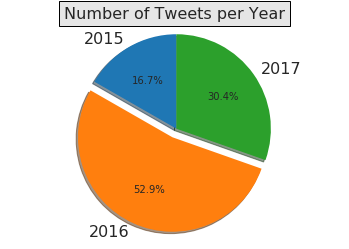

In [61]:
import matplotlib.pyplot as plt
explode = (0, 0.1, 0) # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
labels = '2015','2016','2017'
ax1.pie(grouped_by_year, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Number of Tweets per Year",bbox={'facecolor':'0.9', 'pad':5})
plt.show()


In [66]:
# Prepare Data
dfv = whole[['api_favorite_count', 'dog_name']].groupby('dog_name').apply(lambda x: x.max())
dfv.sort_values('api_favorite_count', inplace=True, ascending=False)
dfv = dfv.head(10)
dfv.set_index('dog_name',inplace=True)
dfv

,api_favorite_count
dog_name,
None,152910.0
Stephan,118074.0
Jamesy,114242.0
Duddles,97422.0
Bo,86518.0
quite,84804.0
Zoey,77247.0
Aja,72968.0
Earl,70834.0


In [81]:
dfv.index

Index(['None', 'Stephan', 'Jamesy', 'Duddles', 'Bo', 'quite', 'Zoey', 'Aja', 'Earl', 'Lilly'], dtype='object', name='dog_name')

In [85]:
dfv['Dog Name'] = dfv.index
dfv

,api_favorite_count,Dog Name
dog_name,,
None,152910.0,None
Stephan,118074.0,Stephan
Jamesy,114242.0,Jamesy
Duddles,97422.0,Duddles
Bo,86518.0,Bo
quite,84804.0,quite
Zoey,77247.0,Zoey
Aja,72968.0,Aja
Earl,70834.0,Earl


In [94]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 8.0MB/s ta 0:00:01
  Found existing installation: seaborn 0.8.1
    Uninstalling seaborn-0.8.1:
      Successfully uninstalled seaborn-0.8.1


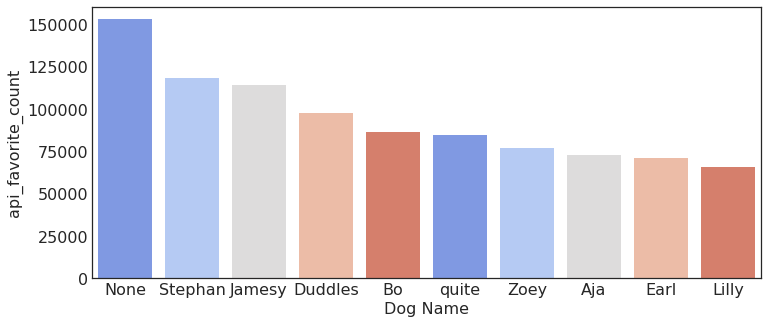

In [106]:
ax = sns.barplot(x="Dog Name", 
y="api_favorite_count", 
lw=1, 
data=dfv, 
palette=sns.color_palette('coolwarm', n_colors=5))
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 10,5


In [20]:
dogs_with_names.query('dog_name=="none"')

,Unnamed: 0,Unnamed: 0.1,tweet_id,timestamp,dog_name,doggo,floofer,pupper,puppo,api_favorite_count,api_lang,api_retweet_count,img_jpg_url,img_img_num,img_p1,img_p1_conf,img_p1_dog,img_p2,img_p2_conf,img_p2_dog,img_p3,img_p3_conf,img_p3_dog,rating,followers_count,statuses_count,friends_count,float_rating


In [18]:
dogs_with_names.sort_values(by='dog_name',ascending=False)

,Unnamed: 0,Unnamed: 0.1,tweet_id,timestamp,dog_name,doggo,floofer,pupper,puppo,api_favorite_count,api_lang,api_retweet_count,img_jpg_url,img_img_num,img_p1,img_p1_conf,img_p1_dog,img_p2,img_p2_conf,img_p2_dog,img_p3,img_p3_conf,img_p3_dog,rating,followers_count,statuses_count,friends_count,float_rating
613,651,819,770655142660169732,2016-08-30 16:11:18,very,None,None,None,None,7265.0,en,1750.0,https://pbs.twimg.com/media/CrHqwjWXgAAgJSe.jpg,1.0,Madagascar_cat,0.494803,False,skunk,0.161184,False,paper_towel,9.157150e-02,False,11/10,8877194.0,13020.0,19.0,1.100000
897,1149,1385,700747788515020802,2016-02-19 18:24:26,very,None,None,None,None,22268.0,en,9007.0,https://pbs.twimg.com/media/CbmOY41UAAQylmA.jpg,1.0,Great_Pyrenees,0.481333,True,Samoyed,0.311769,True,Maltese_dog,7.496210e-02,True,11/10,8877199.0,13020.0,19.0,1.100000
767,911,1120,731156023742988288,2016-05-13 16:15:54,this,None,None,None,None,3741.0,en,1227.0,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1.0,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,4.944380e-02,False,204/170,8877197.0,13020.0,19.0,1.200000
1144,1745,2037,671561002136281088,2015-12-01 05:26:34,the,None,None,None,None,12037.0,en,6747.0,https://pbs.twimg.com/media/CVHdK-7WwAAsuyc.jpg,1.0,Gordon_setter,0.469373,True,black-and-tan_coonhound,0.270893,True,Rottweiler,1.532330e-01,True,13/10,8877127.0,13020.0,19.0,1.300000
1065,1532,1815,676613908052996102,2015-12-15 04:05:01,the,None,None,None,None,1033.0,en,192.0,https://pbs.twimg.com/media/CWPQwmJWUAAu_At.jpg,1.0,book_jacket,0.493790,False,Doberman,0.096423,True,miniature_pinscher,7.064670e-02,True,12/10,8877126.0,13020.0,19.0,1.200000
21,21,22,887517139158093824,2017-07-19 03:39:09,such,None,None,None,None,42689.0,en,10464.0,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1.0,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,2.632080e-02,False,14/10,8877190.0,13020.0,19.0,1.400000
1140,1738,2030,671789708968640512,2015-12-01 20:35:22,space,None,None,None,None,6658.0,en,3222.0,https://pbs.twimg.com/tweet_video_thumb/CVKtH-...,1.0,dalmatian,0.114259,True,teddy,0.062275,False,steam_locomotive,4.970020e-02,False,13/10,8877127.0,13020.0,19.0,1.300000
137,138,169,859196978902773760,2017-05-02 00:04:57,quite,None,None,None,None,84804.0,en,27935.0,https://pbs.twimg.com/ext_tw_video_thumb/85919...,1.0,Angora,0.224218,False,malamute,0.216163,True,Persian_cat,1.283830e-01,False,12/10,8877191.0,13020.0,19.0,1.200000
151,152,193,855459453768019968,2017-04-21 16:33:22,quite,None,None,None,None,28413.0,en,7734.0,https://pbs.twimg.com/media/C98z1ZAXsAEIFFn.jpg,2.0,Blenheim_spaniel,0.389513,True,Pekinese,0.188220,True,Japanese_spaniel,8.262820e-02,True,12/10,8877191.0,13020.0,19.0,1.200000
678,743,924,755206590534418437,2016-07-19 01:04:16,one,doggo,None,None,None,16183.0,en,5253.0,https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg,1.0,web_site,0.906673,False,printer,0.008600,False,carton,4.533190e-03,False,14/10,8877195.0,13020.0,19.0,1.400000


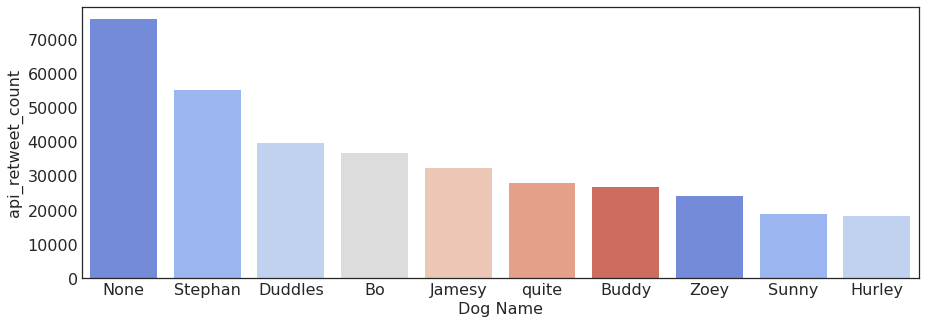

In [110]:
#which one was retweeted most?
dfv2 = whole[['api_retweet_count', 'dog_name']].groupby('dog_name').apply(lambda x: x.max())
dfv2.sort_values('api_retweet_count', inplace=True, ascending=False)
dfv2 = dfv2.head(10)
dfv2['Dog Name'] = dfv2.index #duplicating column so there's one out of index

ax = sns.barplot(x="Dog Name", 
y="api_retweet_count", 
lw=1, 
data=dfv2, 
palette=sns.color_palette('coolwarm', n_colors=7))
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 20,5



In [43]:
!pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

2.1.0
0.8.1


In [38]:
whole.api_retweet_count=whole.api_retweet_count.astype(int)
whole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 28 columns):
Unnamed: 0            1214 non-null int64
Unnamed: 0.1          1214 non-null int64
tweet_id              1214 non-null int64
timestamp             1214 non-null object
dog_name              1214 non-null object
doggo                 1214 non-null object
floofer               1214 non-null object
pupper                1214 non-null object
puppo                 1214 non-null object
api_favorite_count    1214 non-null float64
api_lang              1214 non-null object
api_retweet_count     1214 non-null int64
img_jpg_url           1214 non-null object
img_img_num           1214 non-null float64
img_p1                1214 non-null object
img_p1_conf           1214 non-null float64
img_p1_dog            1214 non-null bool
img_p2                1214 non-null object
img_p2_conf           1214 non-null float64
img_p2_dog            1214 non-null bool
img_p3                1214 non-null o

In [32]:
whole['timestamp'] = pd.to_datetime(whole['timestamp'])
whole['just_date'] = whole['timestamp'].dt.date


In [36]:
whole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 29 columns):
Unnamed: 0            1214 non-null int64
Unnamed: 0.1          1214 non-null int64
tweet_id              1214 non-null int64
timestamp             1214 non-null datetime64[ns]
dog_name              1214 non-null object
doggo                 1214 non-null object
floofer               1214 non-null object
pupper                1214 non-null object
puppo                 1214 non-null object
api_favorite_count    1214 non-null float64
api_lang              1214 non-null object
api_retweet_count     1214 non-null float64
img_jpg_url           1214 non-null object
img_img_num           1214 non-null float64
img_p1                1214 non-null object
img_p1_conf           1214 non-null float64
img_p1_dog            1214 non-null bool
img_p2                1214 non-null object
img_p2_conf           1214 non-null float64
img_p2_dog            1214 non-null bool
img_p3                1214 

In [38]:
whole['year'] = pd.DatetimeIndex(whole['timestamp']).year
whole.sample()

,Unnamed: 0,Unnamed: 0.1,tweet_id,timestamp,dog_name,doggo,floofer,pupper,puppo,api_favorite_count,api_lang,api_retweet_count,img_jpg_url,img_img_num,img_p1,img_p1_conf,img_p1_dog,img_p2,img_p2_conf,img_p2_dog,img_p3,img_p3_conf,img_p3_dog,rating,followers_count,statuses_count,friends_count,float_rating,just_date,year
1185,1906,2201,668645506898350081,2015-11-23 04:21:26,None,None,None,None,None,815.0,en,488.0,https://pbs.twimg.com/media/CUeBiqgXAAARLbj.jpg,1.0,ski_mask,0.302854,False,knee_pad,0.096881,False,balance_beam,0.084076,False,11/10,NaN,NaN,NaN,1.1,2015-11-23,2015


In [43]:
whole.api_lang.unique()

array(['en', 'nl', 'in', 'et'], dtype=object)

In [41]:
whole.loc[whole['dog_name'] == 'Stephan', "api_retweet_count"]

412    55167
Name: api_retweet_count, dtype: int64

In [47]:
whole.query('api_lang == "et"')

,Unnamed: 0,Unnamed: 0.1,tweet_id,timestamp,dog_name,doggo,floofer,pupper,puppo,api_favorite_count,api_lang,api_retweet_count,img_jpg_url,img_img_num,img_p1,img_p1_conf,img_p1_dog,img_p2,img_p2_conf,img_p2_dog,img_p3,img_p3_conf,img_p3_dog,rating,followers_count,statuses_count,friends_count,float_rating
1204,1988,2284,667192066997374976,2015-11-19 04:05:59,None,None,None,None,None,356.0,et,90,https://pbs.twimg.com/media/CUJXpRBXIAAN0yz.jpg,1.0,Rottweiler,0.28364,True,miniature_pinscher,0.148112,True,black-and-tan_coonhound,0.095585,True,12/10,NaN,NaN,NaN,1.2


/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


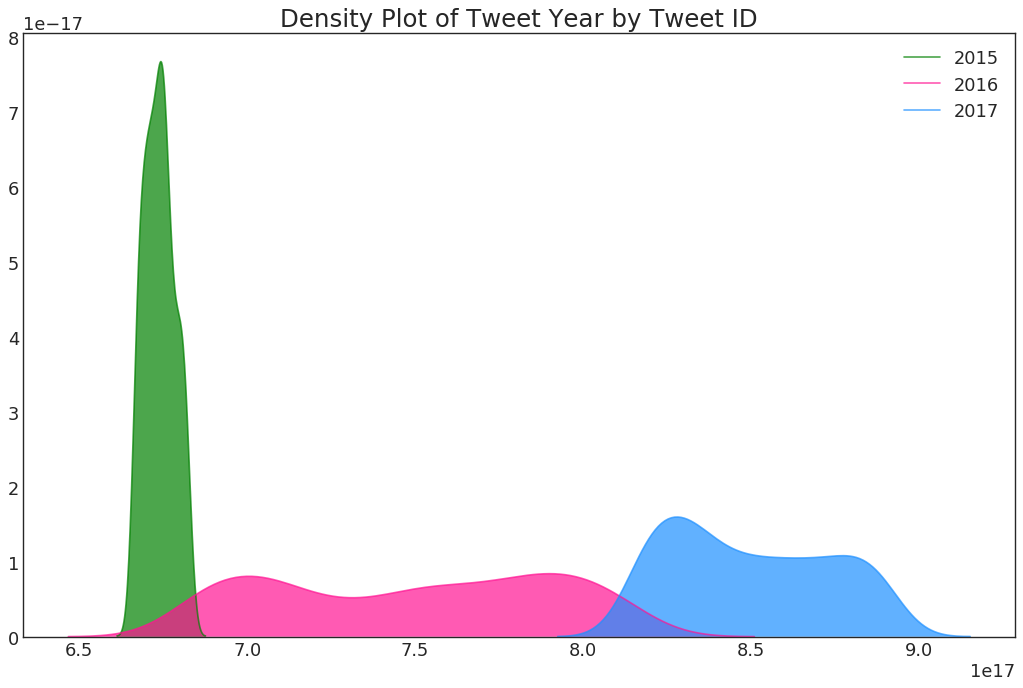

In [64]:
plt.figure(figsize=(16,10), dpi= 80)

sns.kdeplot(whole.loc[whole['year'] == 2015, "tweet_id"], shade=True, color="green", label="2015", alpha=.7)
sns.kdeplot(whole.loc[whole['year'] == 2016, "tweet_id"], shade=True, color="deeppink", label="2016", alpha=.7)
sns.kdeplot(whole.loc[whole['year'] == 2017, "tweet_id"], shade=True, color="dodgerblue", label="2017", alpha=.7)

# Decoration
plt.title('Density Plot of Tweet Year by Tweet ID', fontsize=22)
plt.legend()
plt.show()

In [26]:
whole.sort_values(by='api_favorite_count',ascending=False)

,Unnamed: 0,Unnamed: 0.1,tweet_id,timestamp,dog_name,doggo,floofer,pupper,puppo,api_favorite_count,api_lang,api_retweet_count,img_jpg_url,img_img_num,img_p1,img_p1_conf,img_p1_dog,img_p2,img_p2_conf,img_p2_dog,img_p3,img_p3_conf,img_p3_dog,rating,followers_count,statuses_count,friends_count,float_rating
730,838,1039,744234799360020481,2016-06-18 18:26:18,None,doggo,None,None,None,152910.0,en,75688.0,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,1.844220e-02,True,13/10,8877196.0,13020.0,19.0,1.3
312,320,413,822872901745569793,2017-01-21 18:26:02,None,None,None,None,puppo,130418.0,en,42621.0,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,6.912620e-02,True,13/10,8877190.0,13020.0,19.0,1.3
412,423,534,807106840509214720,2016-12-09 06:17:20,Stephan,None,None,None,None,118074.0,en,55167.0,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1.0,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,7.700810e-02,True,13/10,8877190.0,13020.0,19.0,1.3
109,110,135,866450705531457537,2017-05-22 00:28:40,Jamesy,None,None,pupper,None,114242.0,en,32150.0,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2.0,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,1.770920e-03,True,13/10,8877191.0,13020.0,19.0,1.3
745,873,1079,739238157791694849,2016-06-04 23:31:25,None,doggo,None,None,None,113041.0,en,56310.0,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1.0,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,malamute,8.090120e-02,True,13/10,8877197.0,13020.0,19.0,1.3
58,59,66,879415818425184262,2017-06-26 19:07:24,Duddles,None,None,None,None,97422.0,en,39693.0,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1.0,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,1.104810e-01,True,13/10,8877191.0,13020.0,19.0,1.3
341,349,449,819004803107983360,2017-01-11 02:15:36,Bo,doggo,None,None,None,86518.0,en,36560.0,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1.0,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,9.475920e-02,True,14/10,8877190.0,13020.0,19.0,1.4
137,138,169,859196978902773760,2017-05-02 00:04:57,quite,None,None,None,None,84804.0,en,27935.0,https://pbs.twimg.com/ext_tw_video_thumb/85919...,1.0,Angora,0.224218,False,malamute,0.216163,True,Persian_cat,1.283830e-01,False,12/10,8877191.0,13020.0,19.0,1.2
1049,1487,1766,678399652199309312,2015-12-20 02:20:55,None,None,None,None,None,77513.0,en,30590.0,https://pbs.twimg.com/ext_tw_video_thumb/67839...,1.0,swing,0.929196,False,Bedlington_terrier,0.015047,True,Great_Pyrenees,1.403890e-02,True,12/10,8877125.0,13020.0,19.0,1.2
93,94,115,870374049280663552,2017-06-01 20:18:38,Zoey,None,None,None,None,77247.0,en,24020.0,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1.0,golden_retriever,0.841001,True,Great_Pyrenees,0.099278,True,Labrador_retriever,3.262130e-02,True,13/10,8877191.0,13020.0,19.0,1.3
